# [MAC0417] Visão e Processamento de Imagens - Exercício Programa 3.1
*22 de Janeiro de 2021*

## Introdução 
A primeira parte do Exercício Programa 3 tem como objetivo a segmentação dos objetos de interesse. Este Jupyter Notebook consiste em segmentar o objeto do fundo, produzindo uma imagem binária: 0 para o fundo e 1 para o objeto. Dois tipos de segmentação serão usados: manual, para geração do *ground-truth*, e automática usando o algoritmo de *threshold*.

Integrantes do grupo:

| Nome | NUSP |
|------|------|
| Daniela Favero | 10277443 |
| Mateus Barbosa | 8993368 |
| Vitor Guidi | 8038091 |

A base de dados e os metadados se encontram no nosso repositório do [GitHub](https://github.com/danigfavero/Visao-computacional-e-processamento-de-imagens).

## Preparação do ambiente de programação
### Importando as bibliotecas necessárias para a implementação dos algoritmos

In [1]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import os
from skimage import io
from skimage.exposure import equalize_hist
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib

### Organizando diretórios para o banco de imagens

Para poupar uso de internet ao executar o Notebook, vamos armazenar os resultados da *data augmentation* localmente. Para isto, primeiramente criaremos diretórios para organizar nosso banco de imagens.

O código a seguir gera (caso não existam) os diretórios que abrigarão as imagens segmentadas automática e manualmente.

In [6]:
def init_dirs(direc):
    objs = ["colheres",
                "garfos",
                "canecas",
                "facas",
                "panelas",
                "frigideiras",
                "controles_remotos",
                "calcas",
                "casacos",
                "camisetas"]

    try:
        os.mkdir(direc)
    except FileExistsError:
        pass

    for obj in objs:
        try:
            os.mkdir(direc + "/" + obj)
        except FileExistsError:
            continue
            
init_dirs("binary")
init_dirs("manual")
init_dirs("feret")

## Segmentação
### Definindo um Aplicador de Filtros
A função `data_augmentation()` abaixo aplica o filtro (dado pela função `func`) em todas as imagens cujo caminho é dado por `input_directory`, salvando-as no diretório `output_directory`. Isso é feito gerando-se, programaticamente, os nomes correspondentes a todas as combinações de classes de imagem. Esta função foi fortemente inspirada pela função de mesmo nome utilizada no EP2.

In [7]:
def img_map_dataset(input_directory, output_directory, func):
    objs = ["colheres/COLHER",
            "garfos/GARFO",
            "canecas/CANECA",
            "facas/FACA",
            "panelas/PANELA",
            "frigideiras/FRIGIDEIRA",
            "controles_remotos/CONTROLE",
            "calcas/CALCA",
            "casacos/CASACO",
            "camisetas/CAMISETA"]
    times = ["NOITE", "DIA"]
    illums = [ "INDOOR", "OUTDOOR" ]
    backgrounds = [ "CLARO", "MADEIRA", "ESCURO" ]
    repeats = ["a", "b", "c"]
    nums = ['1', '2', '3']

    path = output_directory
    
    suffixes = list(map("".join, itertools.product(*[backgrounds, nums, repeats, [".jpg"]])))
    
    for it in itertools.product(*[objs, times, illums, suffixes]):
        suffix = "_".join(it)
        url = input_directory + suffix
        path = output_directory + suffix
        for _ in range(3): # evitando erros de conexão (3 tentativas)
            try:
                img = io.imread(url).astype(np.uint8)
                img = func(img)
                io.imsave(path, img)
            except ConnectionResetError:
                continue
            break

### Definindo uma função de limiarização
Examinando no editor de imagens GIMP, notamos que 50 era um limiar empiricamente aceitável para a maior parte das imagens. Assim, binarizamos a imagem a partir deste threshold escolhido. A função abaixo implementa a limiarização de uma imagem.

In [8]:
def threshold(img):
    img = img < 50
    x, y = np.shape(img)
    if np.count_nonzero(img) > x*y/2:
        img = np.logical_not(img)
    return img

### Segmentando as imagens automaticamente
Rodando a função de limirização para todas as imagens do dataset em escalas de cinza. Escolhemos este dataset por simplicidade.

In [5]:
img_map_dataset("grayscale/", "binary/", threshold)

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_NOITE_INDOOR_CLARO1a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_NOITE_INDOOR_CLARO1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_NOITE_INDOOR_CLARO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_NOITE_INDOOR_CLARO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_NOITE_OUTDOOR_CLARO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_NOITE_OUTDOOR_CLARO2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_NOITE_OUTDOOR_CLARO2c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_NOITE_OUTDOOR_CLARO3a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_DIA_INDOOR_CLARO2c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_DIA_INDOOR_CLARO2c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_DIA_INDOOR_CLARO3a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_DIA_INDOOR_CLARO3a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_DIA_INDOOR_CLARO3b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_DIA_OUTDOOR_CLARO2c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_DIA_OUTDOOR_CLARO3a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_DIA_OUTDOOR_CLARO3a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_DIA_OUTDOOR_CLARO3b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/colheres/COLHER_DIA_OUTDOOR_CLARO3b.jpg is a low contrast image
  io.im

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_NOITE_INDOOR_CLARO2c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_NOITE_INDOOR_CLARO3a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_NOITE_INDOOR_CLARO3a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_NOITE_INDOOR_CLARO3b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_NOITE_INDOOR_CLARO3b.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_NOITE_INDOOR_CLARO3c.jpg is 

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_NOITE_OUTDOOR_MADEIRA1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_NOITE_OUTDOOR_MADEIRA1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_NOITE_OUTDOOR_MADEIRA2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_NOITE_OUTDOOR_MADEIRA2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_DIA_INDOOR_MADEIRA1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_DIA_INDOOR_MADEIRA1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_DIA_INDOOR_MADEIRA2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_DIA_INDOOR_MADEIRA2a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_DIA_INDOOR_MADEIRA2b.jpg is a boolean image: setting True to 255 a

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_DIA_OUTDOOR_MADEIRA1b.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_DIA_OUTDOOR_MADEIRA1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_DIA_OUTDOOR_MADEIRA1c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_DIA_OUTDOOR_MADEIRA2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_DIA_OUTDOOR_MADEIRA2a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/garfos/GARFO_DIA_OUTDOOR_MADEIRA2b.j

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/canecas/CANECA_NOITE_INDOOR_MADEIRA1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/canecas/CANECA_NOITE_INDOOR_MADEIRA2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/canecas/CANECA_NOITE_INDOOR_MADEIRA2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/canecas/CANECA_NOITE_INDOOR_MADEIRA2c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/canecas/CANECA_NOITE_OUTDOOR_ESCURO1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/canecas/CANECA_NOITE_OUTDOOR_ESCURO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/canecas/CANECA_NOITE_OUTDOOR_ESCURO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/canecas/CANECA_NOITE_OUTDOOR_ESCURO2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/canecas/CANECA_DIA_INDOOR_ESCURO2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/canecas/CANECA_DIA_INDOOR_ESCURO2c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/canecas/CANECA_DIA_INDOOR_ESCURO3a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/canecas/CANECA_DIA_INDOOR_ESCURO3b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_NOITE_INDOOR_CLARO1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_NOITE_INDOOR_CLARO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_NOITE_INDOOR_CLARO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_NOITE_INDOOR_CLARO2a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_NOITE_INDOOR_CLARO2b.jpg is a boolean image: setting True to 255 and False t

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_NOITE_OUTDOOR_CLARO3a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_NOITE_OUTDOOR_CLARO3b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_NOITE_OUTDOOR_CLARO3c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_NOITE_OUTDOOR_MADEIRA1a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30:

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_DIA_INDOOR_MADEIRA1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_DIA_INDOOR_MADEIRA1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_DIA_INDOOR_MADEIRA2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_DIA_INDOOR_MADEIRA2a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_DIA_INDOOR_MADEIRA2b.jpg is a boolean image: setting True to 255 and False t

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_DIA_OUTDOOR_MADEIRA1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_DIA_OUTDOOR_MADEIRA2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_DIA_OUTDOOR_MADEIRA2a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_DIA_OUTDOOR_MADEIRA2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/facas/FACA_DIA_OUTDOOR_MADEIRA2b.jpg is a low contrast image
  io.imsave(path, img)

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/panelas/PANELA_NOITE_INDOOR_MADEIRA2c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/panelas/PANELA_NOITE_INDOOR_MADEIRA3a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/panelas/PANELA_NOITE_INDOOR_MADEIRA3b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/panelas/PANELA_NOITE_INDOOR_MADEIRA3c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/panelas/PANELA_NOITE_OUTDOOR_ESCURO1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/panelas/PANELA_NOITE_OUTDOOR_ESCURO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/panelas/PANELA_NOITE_OUTDOOR_ESCURO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/panelas/PANELA_NOITE_OUTDOOR_ESCURO2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/panelas/PANELA_DIA_OUTDOOR_CLARO1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/panelas/PANELA_DIA_OUTDOOR_CLARO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/panelas/PANELA_DIA_OUTDOOR_CLARO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/panelas/PANELA_DIA_OUTDOOR_CLARO2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_NOITE_INDOOR_MADEIRA1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_NOITE_INDOOR_MADEIRA1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_NOITE_INDOOR_MADEIRA2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_NOITE_INDOOR_MADEIRA2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.im

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_NOITE_OUTDOOR_ESCURO1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_NOITE_OUTDOOR_ESCURO1b.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_NOITE_OUTDOOR_ESCURO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_NOITE_OUTDOOR_ESCURO1c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_NOITE_OUTDOOR_ESCURO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, pl

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_DIA_INDOOR_ESCURO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_DIA_INDOOR_ESCURO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_DIA_INDOOR_ESCURO2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/frigideiras/FRIGIDEIRA_DIA_INDOOR_ESCURO2c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, i

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_NOITE_INDOOR_CLARO1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_NOITE_INDOOR_CLARO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_NOITE_INDOOR_CLARO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_NOITE_INDOOR_CLARO2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_NOITE_OUTDOOR_MADEIRA1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_NOITE_OUTDOOR_MADEIRA1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_NOITE_OUTDOOR_MADEIRA2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_NOITE_OUTDOOR_MADEIRA2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using i

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_DIA_INDOOR_MADEIRA1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_DIA_INDOOR_MADEIRA1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_DIA_INDOOR_MADEIRA2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_DIA_INDOOR_MADEIRA2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_DIA_OUTDOOR_MADEIRA2c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_DIA_OUTDOOR_MADEIRA3a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_DIA_OUTDOOR_MADEIRA3a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/CONTROLE_DIA_OUTDOOR_MADEIRA3b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/controles_remotos/C

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_NOITE_INDOOR_ESCURO1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_NOITE_INDOOR_ESCURO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_NOITE_INDOOR_ESCURO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_NOITE_INDOOR_ESCURO2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_DIA_INDOOR_CLARO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_DIA_INDOOR_CLARO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_DIA_INDOOR_CLARO2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_DIA_INDOOR_CLARO2c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserW

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_DIA_OUTDOOR_MADEIRA1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_DIA_OUTDOOR_MADEIRA1b.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_DIA_OUTDOOR_MADEIRA1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_DIA_OUTDOOR_MADEIRA1c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/calcas/CALCA_DIA_OUTDOOR_MADEIRA2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/casacos/CASACO_NOITE_INDOOR_ESCURO1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/casacos/CASACO_NOITE_INDOOR_ESCURO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/casacos/CASACO_NOITE_INDOOR_ESCURO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/casacos/CASACO_NOITE_INDOOR_ESCURO2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/casacos/CASACO_DIA_INDOOR_CLARO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/casacos/CASACO_DIA_INDOOR_CLARO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/casacos/CASACO_DIA_INDOOR_CLARO2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/casacos/CASACO_DIA_INDOOR_CLARO2c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:3

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/casacos/CASACO_DIA_OUTDOOR_MADEIRA1a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/casacos/CASACO_DIA_OUTDOOR_MADEIRA1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/casacos/CASACO_DIA_OUTDOOR_MADEIRA1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/casacos/CASACO_DIA_OUTDOOR_MADEIRA2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d

<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/camisetas/CAMISETA_NOITE_INDOOR_MADEIRA2c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/camisetas/CAMISETA_NOITE_INDOOR_MADEIRA3a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/camisetas/CAMISETA_NOITE_INDOOR_MADEIRA3b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/camisetas/CAMISETA_NOITE_INDOOR_MADEIRA3c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)


<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/camisetas/CAMISETA_NOITE_OUTDOOR_ESCURO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/camisetas/CAMISETA_NOITE_OUTDOOR_ESCURO2a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/camisetas/CAMISETA_NOITE_OUTDOOR_ESCURO2b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/camisetas/CAMISETA_NOITE_OUTDOOR_ESCURO2c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)


<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/camisetas/CAMISETA_DIA_INDOOR_ESCURO3c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/camisetas/CAMISETA_DIA_OUTDOOR_CLARO1a.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/camisetas/CAMISETA_DIA_OUTDOOR_CLARO1b.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-input-3-09d10a73d6c3>:30: UserWarning: binary/camisetas/CAMISETA_DIA_OUTDOOR_CLARO1c.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave(path, img)
<ipython-inp

### Segmentando as imagens manualmente
Devido à baixa resolução das imagens e condições adversas de iluminação, foi difícil utilizar somente limiarização automática. Por isso, utilizamos novamente o editor de imagens GIMP para delimitar os objetos dos fundos usando cores de alto contraste. Assim, foi possível gerar novas saídas binarizadas utilizando as imagens editadas manualmente com a função `threshold`.

In [2]:
def img_map(input_directory, output_directory, func):
    for subdir in os.scandir(input_directory):
        for file in os.scandir(subdir):
            url = file.path
            path = file.path.replace(input_directory, output_directory)
            for _ in range(3): # evitando erros de conexão (3 tentativas)
                try:
                    img = io.imread(url).astype(np.uint8)
                    img = func(img)
                    io.imsave(path, img)
                except ConnectionResetError:
                    continue
                break

In [ ]:
img_map("manual/", "binary/", threshold)

## **Feret Box**
Para fazer a delimitação varremos, para cada uma das direções, utilizando uma linha imaginária até acumularmos 95% dos pixels que consistiam no objeto. Feito isso, temos as quatro retas que definem a *bounding box*.

In [3]:
def make_bounding_box(img):
    img_pixels = np.count_nonzero(img)
    height, width = img.shape
    pixel_threshold = 0.95
    rightmost = -1
    leftmost = width + 1
    botmost = -1
    topmost = height + 1

    accum_pixels = 0
    for col in img.T:
        rightmost += 1
        accum_pixels += np.count_nonzero(col)
        if accum_pixels >= pixel_threshold * img_pixels:
            break
            
    accum_pixels = 0
    for col in np.fliplr(img.T):
        leftmost -= 1
        accum_pixels += np.count_nonzero(col)
        if accum_pixels >= pixel_threshold * img_pixels:
            break
            
    accum_pixels = 0
    for row in img:
        botmost += 1
        accum_pixels += np.count_nonzero(row)
        if accum_pixels >= pixel_threshold * img_pixels:
            break
            
    accum_pixels = 0
    for row in np.flipud(img):
        topmost -= 1
        accum_pixels += np.count_nonzero(row)
        if accum_pixels >= pixel_threshold * img_pixels:
            break
    
    if -1 in (leftmost, rightmost, topmost, botmost):
        raise Exception('feret box invalida!')
    
   
    new_width = min(np.abs(rightmost-leftmost+1), width-1)
    new_height = min(np.abs(botmost-topmost+1), height-1)
    new_img = np.zeros((new_height, new_width), dtype=np.uint8)
    for row in range(new_height):
        for col in range(new_width):
            y = min(topmost + row, height-1)
            x = min(leftmost + col, width-1)
            new_img[row][col] = img[y][x]
    return new_img

In [4]:
img_map("binary/", "feret/", make_bounding_box)

<ipython-input-2-5094abd9197d>:10: UserWarning: feret/panelas/PANELA_DIA_INDOOR_CLARO2a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10: UserWarning: feret/panelas/PANELA_NOITE_INDOOR_CLARO2a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10: UserWarning: feret/panelas/PANELA_DIA_INDOOR_CLARO2b.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10: UserWarning: feret/panelas/PANELA_NOITE_INDOOR_CLARO2b.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10: UserWarning: feret/panelas/PANELA_NOITE_INDOOR_CLARO2c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10: UserWarning: feret/panelas/PANELA_DIA_INDOOR_CLARO2c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10: UserWarning: feret/colheres/COLHER_DIA_INDOOR_CLARO2b.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-509

<ipython-input-2-5094abd9197d>:10: UserWarning: feret/casacos/CASACO_NOITE_OUTDOOR_MADEIRA3c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10: UserWarning: feret/facas/FACA_DIA_INDOOR_CLARO3b.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10: UserWarning: feret/facas/FACA_DIA_OUTDOOR_ESCURO3c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10: UserWarning: feret/facas/FACA_NOITE_INDOOR_MADEIRA2a.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10: UserWarning: feret/facas/FACA_DIA_OUTDOOR_ESCURO3b.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10: UserWarning: feret/facas/FACA_DIA_OUTDOOR_MADEIRA3c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10: UserWarning: feret/facas/FACA_DIA_INDOOR_ESCURO3c.jpg is a low contrast image
  io.imsave(path, img)
<ipython-input-2-5094abd9197d>:10:

## Performance dos algoritmos de segmentação
Imprimindo as imagens binarizadas e delimitadas pela Feret box:

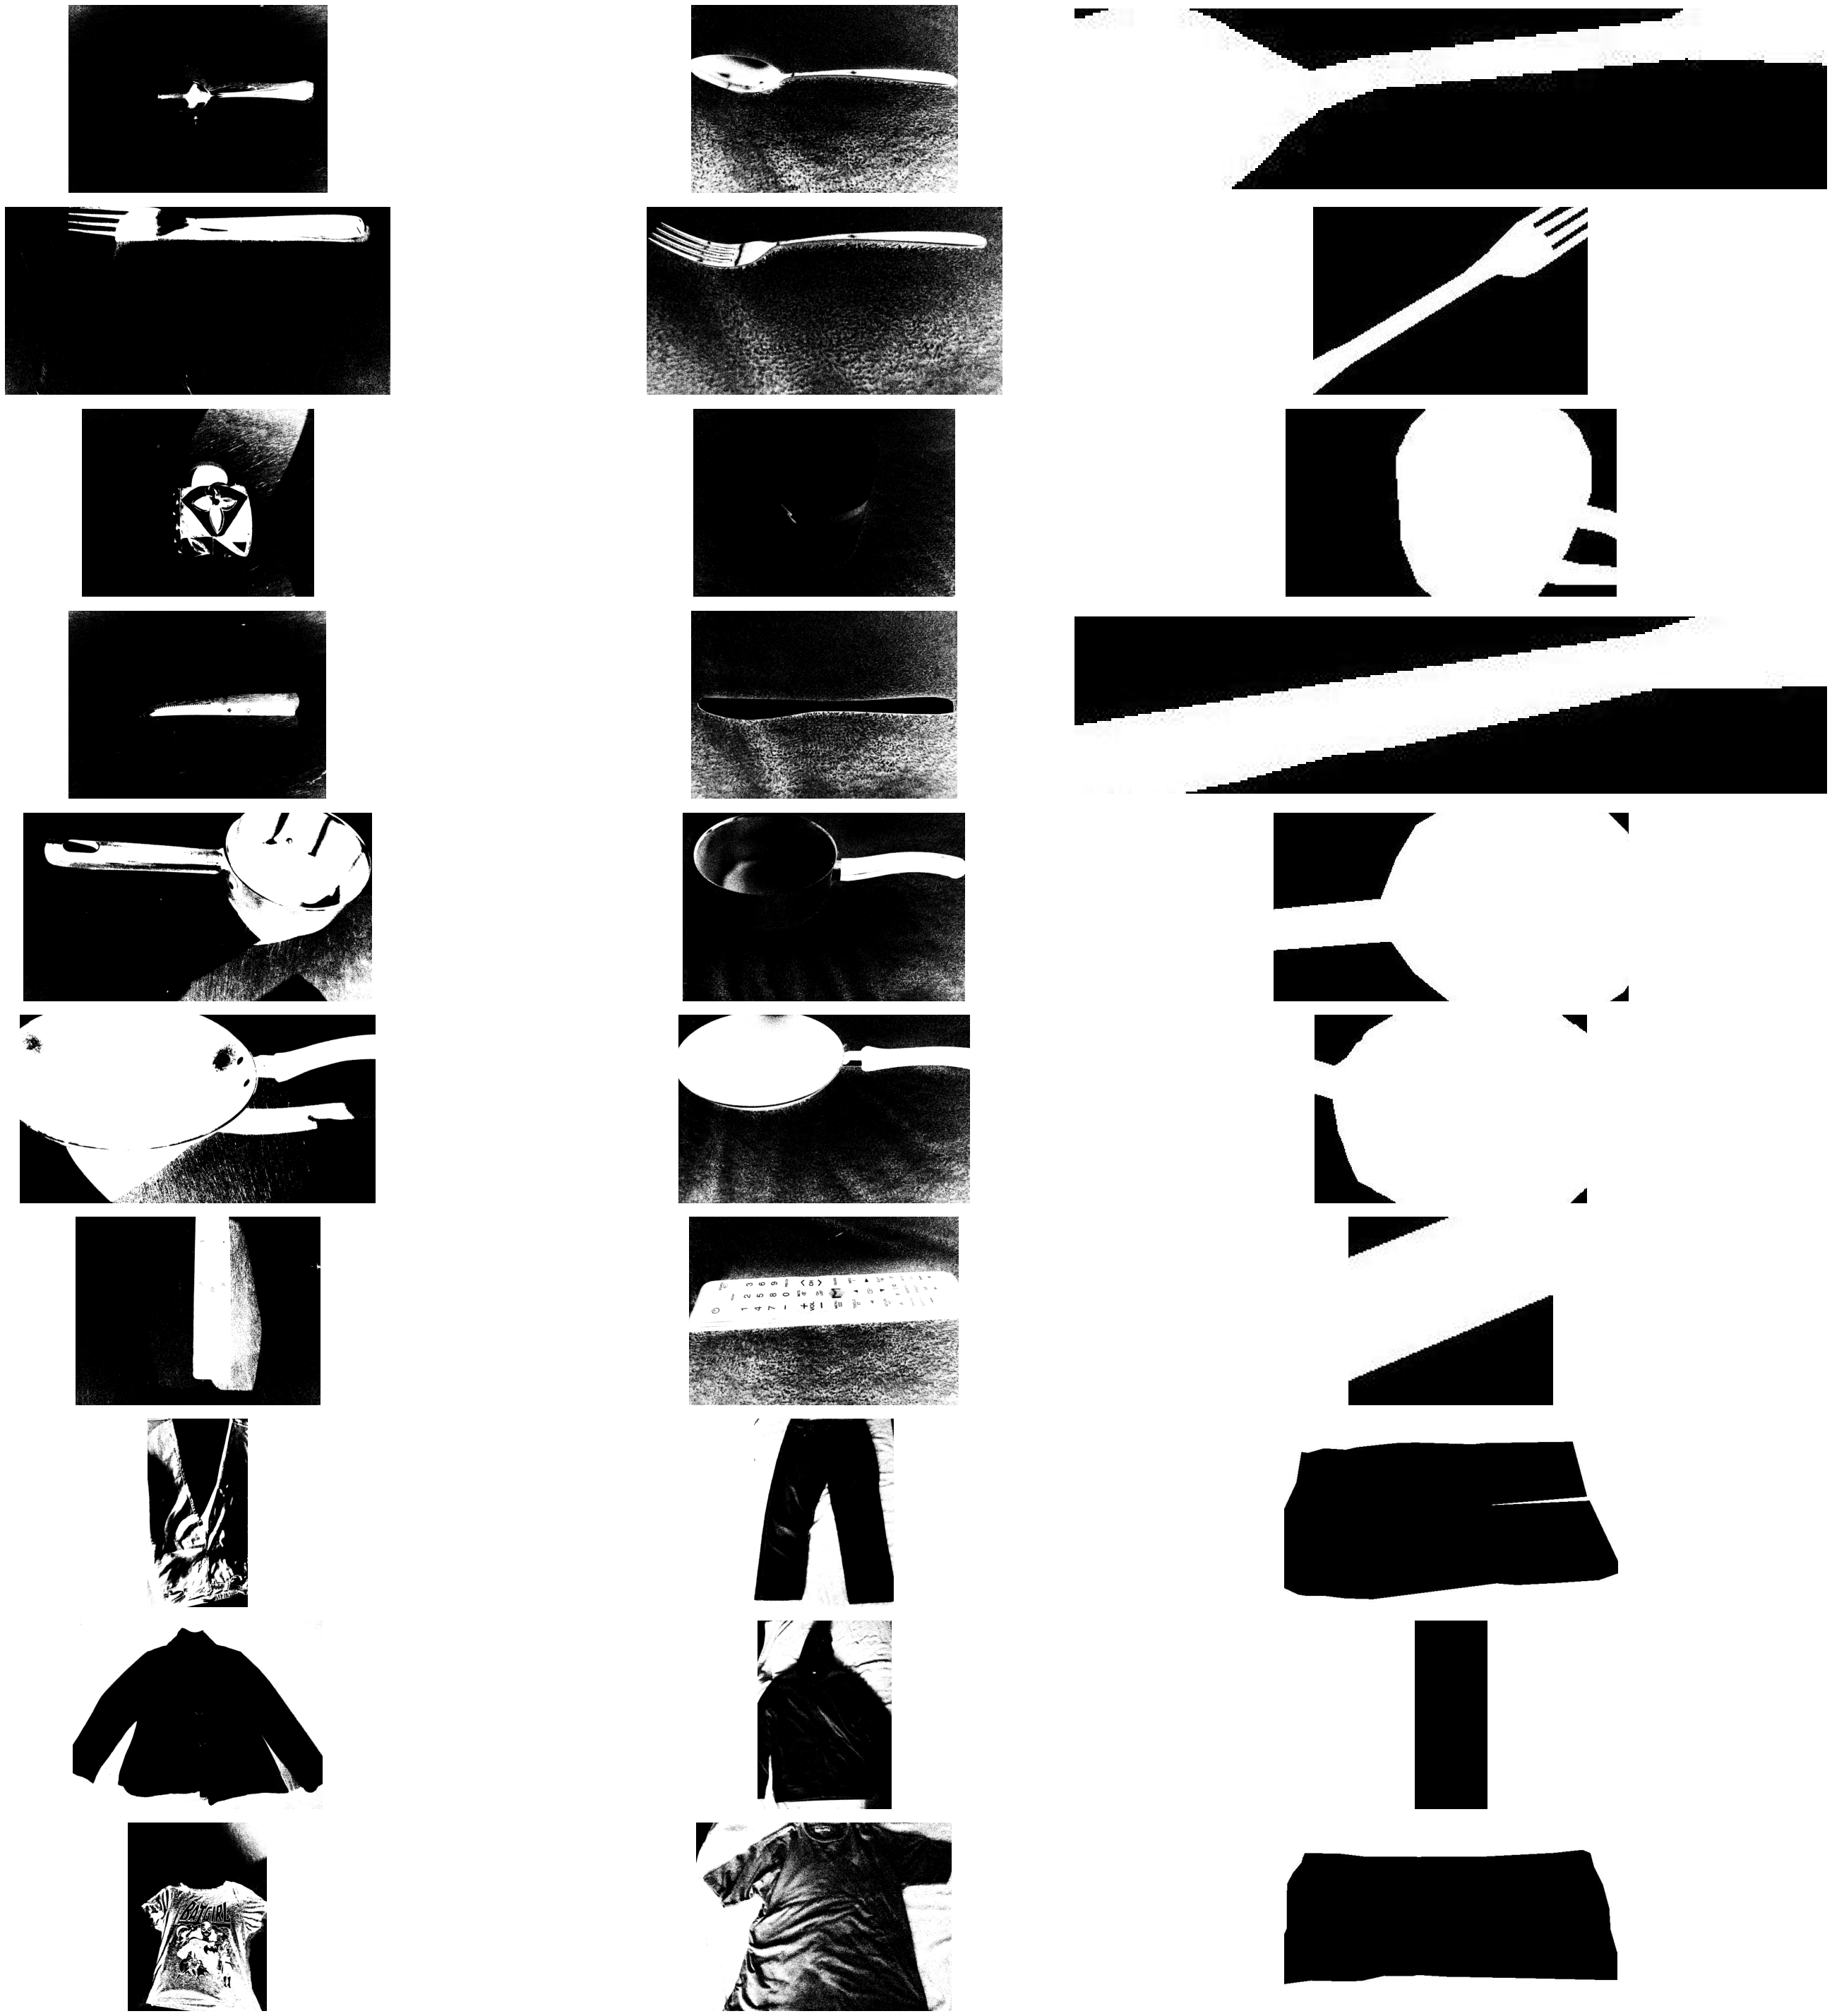

In [3]:
matplotlib.rcParams['font.size'] = 18

directory = "feret/"
objs = ["colheres/COLHER",
        "garfos/GARFO",
        "canecas/CANECA",
        "facas/FACA",
        "panelas/PANELA",
        "frigideiras/FRIGIDEIRA",
        "controles_remotos/CONTROLE",
        "calcas/CALCA",
        "casacos/CASACO",
        "camisetas/CAMISETA"]
instances = 3 # número de instâncias de cada objeto

fig, axes = plt.subplots(len(objs), instances, figsize=(40, 40))
for i in range(len(objs)):
    for j in range(instances):
        url = directory + objs[i] + "_NOITE_OUTDOOR_MADEIRA" + str(j+1) + "a.jpg"
        for _ in range(3): # evitando erros de conexão (3 tentativas)
            try:
                img = io.imread(url)
            except ConnectionResetError:
                continue
            break

        axes[i, j].imshow(img, cmap=plt.cm.gray)
        axes[i, j].axis('off')
fig.tight_layout()
plt.show()

Em geral, a binarização foi satisfatória, mas as imagens manualmente segmentadas apresentaram melhor desempenho. Além disso, o algoritmo que delimita a Feret box também ficou adequado.